## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [6]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
Dense = keras.layers.Dense

def build_mlp():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = Dense(units=521, activation='relu')(input_layer)
    x = Dense(units=256, activation='relu')(x)
    x = Dense(units=128, activation='relu')(x)
    output_layer = Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])

    return model

In [10]:
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 521)               1601033   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               133632    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,768,851
Trainable params: 1,768,851
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
Compile your model
"""

optimizer = keras.optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
"""
Set epochs
"""
epochs = 500

model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 105us/step - loss: 2.1027 - acc: 0.2512 - val_loss: 1.9890 - val_acc: 0.2875
Epoch 2/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.9017 - acc: 0.3321 - val_loss: 1.8699 - val_acc: 0.3376
Epoch 3/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.8261 - acc: 0.3594 - val_loss: 1.8221 - val_acc: 0.3481
Epoch 4/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.7752 - acc: 0.3766 - val_loss: 1.7674 - val_acc: 0.3622
Epoch 5/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.7362 - acc: 0.3908 - val_loss: 1.7539 - val_acc: 0.3742
Epoch 6/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.7069 - acc: 0.4006 - val_loss: 1.7005 - val_acc: 0.4019
Epoch 7/500
50000/50000 [==============================] - 5s 106us/s

50000/50000 [==============================] - 5s 102us/step - loss: 1.1901 - acc: 0.5837 - val_loss: 1.4370 - val_acc: 0.4907
Epoch 58/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.1859 - acc: 0.5842 - val_loss: 1.3628 - val_acc: 0.5155
Epoch 59/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1728 - acc: 0.5907 - val_loss: 1.3859 - val_acc: 0.5100
Epoch 60/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1728 - acc: 0.5899 - val_loss: 1.3759 - val_acc: 0.5101
Epoch 61/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1662 - acc: 0.5900 - val_loss: 1.4252 - val_acc: 0.5038
Epoch 62/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1599 - acc: 0.5955 - val_loss: 1.4214 - val_acc: 0.4908
Epoch 63/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1547 - acc: 0.5967 - val_loss: 1.4625 - val_acc: 0.4814
Epoch 64/500
50000/50000 [============

Epoch 116/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8649 - acc: 0.7017 - val_loss: 1.4660 - val_acc: 0.5056
Epoch 117/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.8606 - acc: 0.7035 - val_loss: 1.5898 - val_acc: 0.4880
Epoch 118/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8426 - acc: 0.7070 - val_loss: 1.5378 - val_acc: 0.4998
Epoch 119/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8495 - acc: 0.7062 - val_loss: 1.4525 - val_acc: 0.5221
Epoch 120/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8381 - acc: 0.7109 - val_loss: 1.5273 - val_acc: 0.5107
Epoch 121/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8375 - acc: 0.7100 - val_loss: 1.5591 - val_acc: 0.4956
Epoch 122/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.8327 - acc: 0.7122 - val_loss: 1.5191 - val_acc: 0.5060
Epoch 123/500
50000/

50000/50000 [==============================] - 5s 96us/step - loss: 0.5774 - acc: 0.8068 - val_loss: 1.5682 - val_acc: 0.5200
Epoch 175/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.5566 - acc: 0.8128 - val_loss: 1.9496 - val_acc: 0.4875
Epoch 176/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.5584 - acc: 0.8122 - val_loss: 1.6128 - val_acc: 0.5240
Epoch 177/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.5623 - acc: 0.8103 - val_loss: 1.5218 - val_acc: 0.5458
Epoch 178/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.5387 - acc: 0.8191 - val_loss: 1.8377 - val_acc: 0.4953
Epoch 179/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.5597 - acc: 0.8138 - val_loss: 1.5401 - val_acc: 0.5414
Epoch 180/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.5550 - acc: 0.8126 - val_loss: 1.5934 - val_acc: 0.5352
Epoch 181/500
50000/50000 [=======

50000/50000 [==============================] - 5s 108us/step - loss: 0.3304 - acc: 0.8987 - val_loss: 2.0589 - val_acc: 0.5172
Epoch 233/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.3400 - acc: 0.8949 - val_loss: 1.8592 - val_acc: 0.5316
Epoch 234/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.2954 - acc: 0.9083 - val_loss: 1.9777 - val_acc: 0.5243
Epoch 235/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.2848 - acc: 0.9144 - val_loss: 1.8719 - val_acc: 0.5436
Epoch 236/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.2910 - acc: 0.9117 - val_loss: 1.9333 - val_acc: 0.5326
Epoch 237/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.3173 - acc: 0.9011 - val_loss: 2.1079 - val_acc: 0.5071
Epoch 238/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.3109 - acc: 0.9036 - val_loss: 2.1725 - val_acc: 0.4997
Epoch 239/500
50000/50000 [

50000/50000 [==============================] - 5s 102us/step - loss: 0.0985 - acc: 0.9800 - val_loss: 2.2249 - val_acc: 0.5282
Epoch 291/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.2620 - acc: 0.9329 - val_loss: 2.2929 - val_acc: 0.5237
Epoch 292/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0973 - acc: 0.9807 - val_loss: 2.2196 - val_acc: 0.5374
Epoch 293/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1769 - acc: 0.9555 - val_loss: 2.3486 - val_acc: 0.5245
Epoch 294/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1796 - acc: 0.9524 - val_loss: 2.1644 - val_acc: 0.5247
Epoch 295/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.0965 - acc: 0.9808 - val_loss: 2.2172 - val_acc: 0.5457
Epoch 296/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.1826 - acc: 0.9558 - val_loss: 2.2918 - val_acc: 0.5264
Epoch 297/500
50000/50000 [

50000/50000 [==============================] - 5s 101us/step - loss: 0.4034 - acc: 0.8951 - val_loss: 2.4722 - val_acc: 0.5396
Epoch 349/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0476 - acc: 0.9942 - val_loss: 2.4975 - val_acc: 0.5394
Epoch 350/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0404 - acc: 0.9960 - val_loss: 2.6061 - val_acc: 0.5320
Epoch 351/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.3286 - acc: 0.9214 - val_loss: 4.0942 - val_acc: 0.4064
Epoch 352/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.2966 - acc: 0.9277 - val_loss: 2.4469 - val_acc: 0.5494
Epoch 353/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.0486 - acc: 0.9938 - val_loss: 2.5138 - val_acc: 0.5372
Epoch 354/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0401 - acc: 0.9960 - val_loss: 2.5304 - val_acc: 0.5395
Epoch 355/500
50000/50000 [

50000/50000 [==============================] - 5s 97us/step - loss: 0.0124 - acc: 0.9996 - val_loss: 2.8270 - val_acc: 0.5427
Epoch 407/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0119 - acc: 0.9999 - val_loss: 2.8383 - val_acc: 0.5419
Epoch 408/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0119 - acc: 0.9997 - val_loss: 2.8488 - val_acc: 0.5395
Epoch 409/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0117 - acc: 0.9997 - val_loss: 2.8419 - val_acc: 0.5452
Epoch 410/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0115 - acc: 0.9999 - val_loss: 2.8476 - val_acc: 0.5456
Epoch 411/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0113 - acc: 0.9998 - val_loss: 2.8598 - val_acc: 0.5453
Epoch 412/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0113 - acc: 0.9998 - val_loss: 2.8758 - val_acc: 0.5432
Epoch 413/500
50000/50000 [======

50000/50000 [==============================] - 6s 111us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 3.0309 - val_acc: 0.5417
Epoch 465/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 3.0448 - val_acc: 0.5397
Epoch 466/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 3.0442 - val_acc: 0.5427
Epoch 467/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 3.0544 - val_acc: 0.5402
Epoch 468/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 3.0426 - val_acc: 0.5404
Epoch 469/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 3.0429 - val_acc: 0.5399
Epoch 470/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 3.0527 - val_acc: 0.5415
Epoch 471/500
50000/50000 [

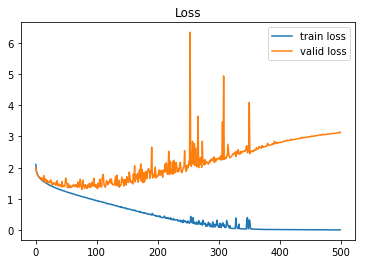

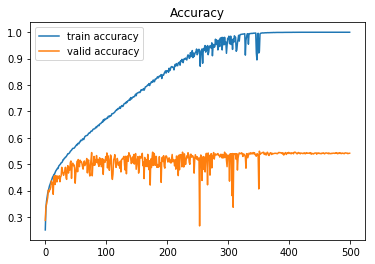

In [17]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()